# Seattle Airbnb Business Analysis

### I - Business Understanding

With this project I want to answer following questions to understand the Airbnb business in Seattle:
1.	Which kind of accommodations are listed where and how do they make up the price?
2.	How is the price progress over the year?
3.	What time of year is the most popular for bookings?
4.	Which Neighborhood is the most popular?
5.	Which of the Seattle’s Top 10 neighbourhoods are the most expensive?
6.	What are the most mentioned words in the comments?
7.	Which type of accommodation has the most reviews?
8.	Which hosts have had the highest availability in the given period?
9.	Which hosts have the highest estimated revenue, assuming that availability has been fully used?

### II - Data understanding and Preparation:

In [62]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
from scipy.optimize import curve_fit
import seaborn as sns #heatmapping
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from datetime import date
%matplotlib inline

In [5]:
# Loading the Seattle listings.csv file and name it df1 
df1 = pd.read_csv('/Users/selengerel/Udacity_DataScientist/Project1/seattle_data/listings.csv')

# Loading the Seattle reviews.csv file and name it df2 
df2 = pd.read_csv('/Users/selengerel/Udacity_DataScientist/Project1/seattle_data/reviews.csv')

# Loading the Seattle calendar.csv file and name it df3
df3 = pd.read_csv('/Users/selengerel/Udacity_DataScientist/Project1/seattle_data/calendar.csv')

#### 1. Listings file

In [6]:
df1.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [7]:
# show all columns of listings.csv, df1
df1.columns 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
# show information about df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

#### 2. Reviews file

In [9]:
df2.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [10]:
df2.columns 

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


#### 3. Calendar file

In [12]:
df3.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [13]:
df3.columns 

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [15]:
print('The Seattle Airbnb data has {} listings, which were rented out by {} hosts.'.
      format(df1.shape[0], df1.host_id.nunique()))
print('The Seattle Airbnb data has {} reviews, provided from {} to {}.'.
      format(df2.shape[0], df2.date.min(), df2.date.max()))
print('The availability data for Seattle Airbnb has been provided from {} to {} on {} homes.'.
      format(df3.date.min(), df3.date.max(), df3.listing_id.nunique()))

The Seattle Airbnb data has 3818 listings, which were rented out by 2751 hosts.
The Seattle Airbnb data has 84849 reviews, provided from 2009-06-07 to 2016-01-03.
The availability data for Seattle Airbnb has been provided from 2016-01-04 to 2017-01-02 on 3818 homes.


#### 4. Data Cleaning

##### Renaming some columns

In [16]:
# rename the column of df1 "id" to "listing_id" for later comparison with df2 and df3 dataframes
df1 = df1.rename(columns={'id': 'listing_id'})
df2 = df2.rename(columns={'id': 'comment_id'})

# renaming the column of df3 "price" to "price_2" for later merge
df3 = df3.rename(columns={'price': 'price_2'})

##### Converting column date from string to date format

In [17]:
# converting datatype of date to datetime format
df1['host_since'] = pd.to_datetime(df1['host_since'])
df1['first_review'] = pd.to_datetime(df1['first_review'])
df1['last_review'] = pd.to_datetime(df1['last_review'])
df2["date"]= pd.to_datetime(df2["date"])
df3["date"]= pd.to_datetime(df3["date"]) 

##### Converting column price from object to float format

In [18]:
# convert datatype of price to float by removing the non-numeric characters from the string
df1['price'] = df1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df3['price_2'] = df3['price_2'].replace({'\$': '', ',': ''}, regex=True).astype(float)

#### Replacements

In [19]:
# Replacing columns with f/t with 0/1
df1.replace({'f': 0, 't': 1}, inplace=True)

# Changing the column available with f/t to a boolean
df3.available.replace('f', False, inplace=True)
#df3.replace({'f': 0, 't': 1}, inplace=True)
df3.available.replace('t', True, inplace=True)
#df3.replace({'f': 0, 't': 1}, inplace=True)

##### Handling NaN values

In [20]:
# Checking the columns with missing values in df1
df1.isna().sum()[df1.isna().sum() > 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

In [21]:
# dropping columns with many missing values and those which are not necessary for my analysis
column_to_drop = ["neighborhood_overview", "notes", "transit","host_thumbnail_url", "medium_url", 
                  "xl_picture_url", "host_neighbourhood","host_acceptance_rate","square_feet","weekly_price", "monthly_price",
                  "security_deposit", "cleaning_fee","license"]
df1 = df1.drop(column_to_drop, axis=1)

In [22]:
df1[['property_type']] = df1[['property_type']].fillna(value=0)
df1[['bathrooms']] = df1[['bathrooms']].fillna(value=0)
df1[['bedrooms']] = df1[['bedrooms']].fillna(value=0)
df1[['beds']] = df1[['beds']].fillna(value=0)

In [23]:
# Checking the columns with missing values in df2
df2.isna().sum()[df2.isna().sum() > 0]

comments    18
dtype: int64

In [24]:
df2[['comments']] = df2[['comments']].fillna(value=0)

In [25]:
# Checking the columns with missing values in df3
#df3.isna().sum()[df3.isna().sum() > 0]

In [26]:
#df3[['price_2']] = df3[['price_2']].fillna(value=0)

#### Handling categorical values

In [27]:
print(df1['amenities'])

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object


In [28]:
# dummy variables for 'amenities'
df1.amenities[0].replace('"','').replace("'",'').replace('{','').replace('}','').replace('[','').replace(']','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

#### Filling the missing values with median

In [29]:
# filling missing values by median for the columns regarding review scores
rev_scores_col = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'reviews_per_month']
for col in rev_scores_col:
    df1[col].fillna(df1[col].median(), inplace=True)

#### Exclusions

In [30]:
# excluding the listings with 0 for bathrooms, bedrooms, beds, accomodates, number of reviews and price
df1 = df1[df1.bathrooms > 0]
df1 = df1[df1.bedrooms > 0]
df1 = df1[df1.beds > 0]
df1 = df1[df1.accommodates  > 0]
df1 = df1[df1.number_of_reviews  > 0]
df1 = df1[df1.price  > 0]

### III - Data Exploration

In [31]:
# keep the relevant columns from listings.csv, df1
df1 = df1[['listing_id', 'name', 'summary', 'space', 'description', 'neighbourhood_cleansed', 'street', 'latitude', 'longitude',
           'host_id', 'host_name', 'host_since', 'host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count',
           'price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
           'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
           'review_scores_value', 'reviews_per_month', 'number_of_reviews', 'first_review', 'last_review',
           'minimum_nights', 'maximum_nights']]

df1.head(3)

,listing_id,name,summary,space,description,neighbourhood_cleansed,street,latitude,longitude,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,number_of_reviews,first_review,last_review,minimum_nights,maximum_nights
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,10.0,10.0,9.0,10.0,4.07,207,2011-11-01,2016-01-02,1,365
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,West Queen Anne,"7th Avenue West, Seattle, WA 98119, United States",47.639123,-122.365666,5177328,...,10.0,10.0,10.0,10.0,1.48,43,2013-08-19,2015-12-29,2,90
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,West Queen Anne,"West Lee Street, Seattle, WA 98119, United States",47.629724,-122.369483,16708587,...,10.0,10.0,10.0,10.0,1.15,20,2014-07-30,2015-09-03,4,30


#### 1. Which kind of accommodations are listed where and how do they make up the price?

In [32]:
# Analyzing the property type and its number of listings
# The assumption is that each listing_id represents an unique object 
propertyType_DF = df1.groupby('property_type').listing_id.count()
propertyType_DF = propertyType_DF.reset_index()

# changing the resulted column to 'number_of_listings'
propertyType_DF = propertyType_DF.rename(columns={'listing_id':'number_of_listings'})
propertyType_DF = propertyType_DF[propertyType_DF.property_type != 0]
propertyType_DF

,property_type,number_of_listings
0,Apartment,1204
1,Bed & Breakfast,26
2,Boat,5
3,Bungalow,2
4,Cabin,17
5,Camper/RV,8
6,Chalet,1
7,Condominium,68
8,Dorm,1
9,House,1409


Text(0, 0.5, 'number of listings')

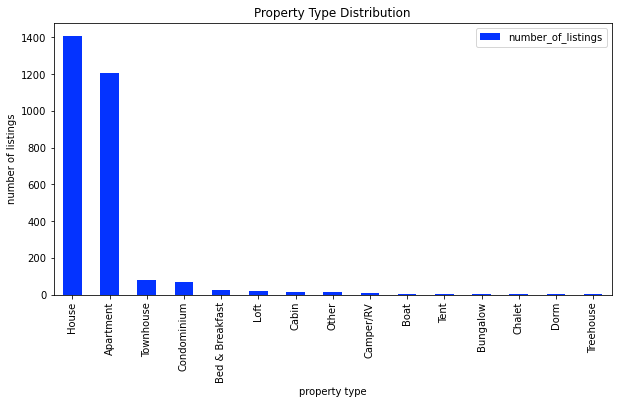

In [33]:
# Plotting the results above in a bar diagram
propertyType_DF.sort_values(by='number_of_listings',ascending=False).plot(kind='bar',
                                                                          x='property_type',
                                                                          y='number_of_listings',
                                                                          color = '#0433FF',
                                                                          figsize =(10,5), 
                                                                          title = 'Property Type Distribution', 
                                                                          legend = True)
plt.xlabel('property type')
plt.ylabel('number of listings')

Property types 'House' and 'Apartment' are the most listed ones.

In [34]:
for col in ['property_type']:
    print('**Proportion of property types in Seattle**')
    print(df1[col].value_counts(normalize=True))

**Proportion of property types in Seattle**
House              0.492485
Apartment          0.420832
Townhouse          0.027962
Condominium        0.023768
Bed & Breakfast    0.009088
Loft               0.007690
Cabin              0.005942
Other              0.004544
Camper/RV          0.002796
Boat               0.001748
Tent               0.001398
Bungalow           0.000699
Dorm               0.000350
Treehouse          0.000350
Chalet             0.000350
Name: property_type, dtype: float64


In [35]:
# Analyzing the room type and its number of listings
# The assumption is that each listing_id represents an unique object 
roomType_DF = df1.groupby('room_type').listing_id.count()
roomType_DF = roomType_DF.reset_index()
roomType_DF = roomType_DF.rename(columns={'listing_id':'number_of_listings'})
roomType_DF

,room_type,number_of_listings
0,Entire home/apt,1819
1,Private room,950
2,Shared room,92


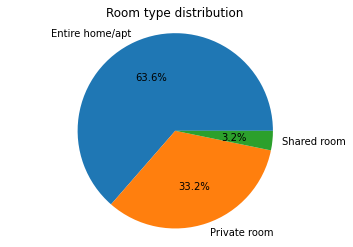

In [36]:
# Visualizing the results above in a pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Entire home/apt', 'Private room', 'Shared room']
sizes = [1819, 950, 92]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Room type distribution')

plt.show()

The pie plot above shows that Entire home/apartments and Private rooms are the majority.<br/>

In [37]:
for col in ['room_type']:
    print('**Proportion of room types in Seattle**')
    print(df1[col].value_counts(normalize=True))

**Proportion of room types in Seattle**
Entire home/apt    0.635792
Private room       0.332052
Shared room        0.032157
Name: room_type, dtype: float64


Text(0.5, 1.0, 'Listings by property and room type')

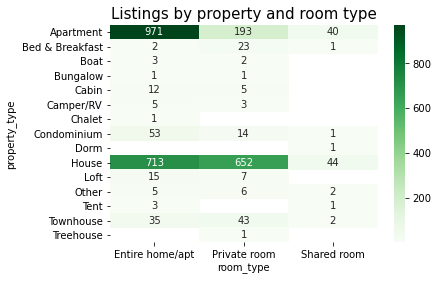

In [38]:
# Heatmapping the number of listings based on both property type and room type
ax = sns.heatmap(df1.groupby(['property_type','room_type']).
               listing_id.count().unstack(level=1),annot=True, fmt=".0f", cmap='Greens')
ax.set_title('Listings by property and room type', fontsize=15)

The combination of property type and room type shows again, that **entire Apartment and entire House** have the highest number of listings, following by **Private room in a House and in an Apartment**.<br/>

**Now I'll see, how the property type & room type relate with the price by showing the mean price for each combination:**

In [39]:
propertyRoom_DF = df1.groupby(['property_type','room_type']).price.mean().apply("{0:.2f}".format)
propertyRoom_DF = propertyRoom_DF.reset_index()
propertyRoom_DF = propertyRoom_DF.sort_values(by=['price'], ascending=True)
propertyRoom_DF.head()

,property_type,room_type,price
7,Boat,Private room,122.50
10,Cabin,Entire home/apt,122.75
24,Other,Entire home/apt,131.00
14,Chalet,Entire home/apt,135.00
0,Apartment,Entire home/apt,140.46


Text(0.5, 24.0, 'room_type')

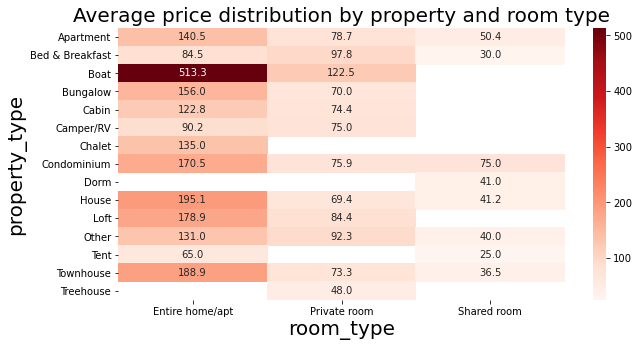

In [40]:
# Plotting the results above in a heatmap
plt.figure(figsize=(10,5))
ax = sns.heatmap(df1.groupby(['property_type','room_type']).
                 price.mean().unstack(level=1),annot=True, fmt=".1f", cmap='Reds')
ax.set_title('Average price distribution by property and room type', fontsize=20)
plt.ylabel('property_type', fontsize=20)
plt.xlabel('room_type', fontsize=20)

The above price distribution shows, that (of course apart from the expensive Boat) **Entire House/Towhouse/Loft/Bungalow/Condominium** are the most expensive ones, whereas the shared rooms are the cheapest in any property types except Condominuim, which costs same in private room. <br/>

**Now, under consideration of minimum_nights how does the price distribution look like on property and room type?**

In [41]:
df1[['listing_id','minimum_nights']].groupby(['minimum_nights']).count().sort_values('minimum_nights')

,listing_id
minimum_nights,
1,1122
2,1140
3,380
4,90
5,53
6,13
7,31
10,3
12,1


In [42]:
# drop the listing with 1000 minimum_nights
df1 = df1[df1.minimum_nights != 1000]

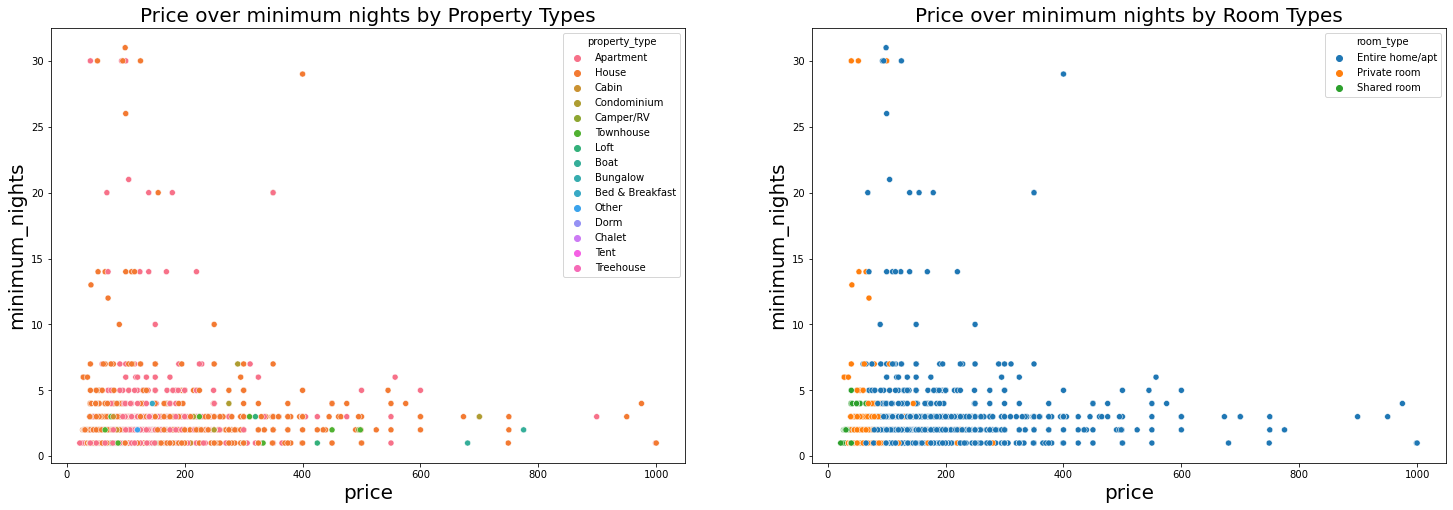

In [43]:
# considering the minimum_nights how does the price distribution look like on property and room type?
fig = plt.figure(figsize=(25,8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df1,x='price',y='minimum_nights',hue='property_type')
plt.ylabel('minimum_nights', fontsize=20)
plt.xlabel('price', fontsize=20)
plt.title('Price over minimum nights by Property Types', fontsize=20);

plt.subplot(1, 2, 2)
sns.scatterplot(data=df1,x='price',y='minimum_nights',hue='room_type')
plt.ylabel('minimum_nights', fontsize=20)
plt.xlabel('price', fontsize=20)
plt.title('Price over minimum nights by Room Types', fontsize=20);

The hosts offer their accommodations mostly short term wise up to a week and the price density lies between 22 to over 400. 
More than 10 days until a month is not common.

**Next, I want to know the estimated revenue including minimum_nights.**

In [44]:
# Showing 5 highest revenue listings
df1['estimated_revenue'] = df1['price'] * df1['minimum_nights']
df1[['listing_id','property_type','room_type','number_of_reviews','minimum_nights','accommodates','bedrooms','beds',
     'price','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,property_type,room_type,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,price,estimated_revenue
3753,5061411,House,Entire home/apt,4,29,8,3.0,3.0,400.0,11600.0
1230,6766708,Condominium,Entire home/apt,3,20,6,2.0,3.0,350.0,7000.0
1500,4009508,Apartment,Entire home/apt,38,20,5,2.0,2.0,350.0,7000.0
2,3308979,House,Entire home/apt,20,4,11,5.0,7.0,975.0,3900.0
3524,2764126,House,Entire home/apt,13,30,2,2.0,2.0,125.0,3750.0


The highest estimated_revenue can be achieved by hosts, who offer their Eintire homes for almost a month.

In [45]:
# Showing lowest revenue listings (minimum_nights <=7)
df1.loc[df1['minimum_nights']<=7, ['listing_id','property_type','room_type',
                                    'number_of_reviews','minimum_nights','accommodates',
                                    'bedrooms','beds','price','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,property_type,room_type,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,price,estimated_revenue
2,3308979,House,Entire home/apt,20,4,11,5.0,7.0,975.0,3900.0
1070,3385421,Apartment,Entire home/apt,31,6,4,2.0,2.0,557.0,3342.0
2828,8273031,Apartment,Entire home/apt,1,5,6,2.0,3.0,600.0,3000.0
3443,2720963,House,Entire home/apt,5,3,6,3.0,3.0,950.0,2850.0
3577,6066570,House,Entire home/apt,1,5,14,6.0,9.0,545.0,2725.0


Short term hosts have lower revenue compared to the long term hosts.

In [46]:
# Number of beds in listings with bedrooms
beds_DF = df1[['beds','listing_id']].groupby(['beds']).count().sort_values('listing_id', ascending=False)
beds_DF.rename(columns={'listing_id':'# of listings'}, inplace=True)
beds_DF

,# of listings
beds,
1.0,1580
2.0,695
3.0,361
4.0,124
5.0,60
6.0,17
7.0,14
8.0,3
9.0,3


1 to 2 beds configuration has mostly in demand..

In [47]:
# listings with up to 5 beds
df1.loc[df1['beds']<=5, ['beds','listing_id',
                         'property_type','room_type']].groupby(['beds','property_type',
                                                                'room_type']).count().sort_values('listing_id', ascending=False).head()

listing_id
beds property_type room_type                  
1.0  House         Private room            574
     Apartment     Entire home/apt         495
2.0  Apartment     Entire home/apt         307
     House         Entire home/apt         228
3.0  House         Entire home/apt         203

In [48]:
df1.loc[df1['beds']<=5, ['listing_id','property_type','room_type',
                                    'number_of_reviews','minimum_nights','accommodates',
                                    'bedrooms','beds','price','estimated_revenue']].sort_values('beds', ascending=False).head()

,listing_id,property_type,room_type,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,price,estimated_revenue
461,108468,House,Entire home/apt,2,3,9,4.0,5.0,395.0,1185.0
3369,8168876,House,Entire home/apt,1,3,8,3.0,5.0,239.0,717.0
1165,6734621,Townhouse,Entire home/apt,29,1,10,3.0,5.0,333.0,333.0
2270,2016613,House,Entire home/apt,16,3,8,4.0,5.0,300.0,900.0
3385,6577729,Apartment,Entire home/apt,17,2,6,2.0,5.0,100.0,200.0


##### It can be said, that Entire Apartments with up to 5 beds are listed the most, but have lower estimated revenue due to minimum_nights to be booked. Whereas the Entire House with up to 5 beds can be achieved mire revenue even the minimum_nights are less.<br/><br/>

**How about the location distribution of property & room types in Seattle?**

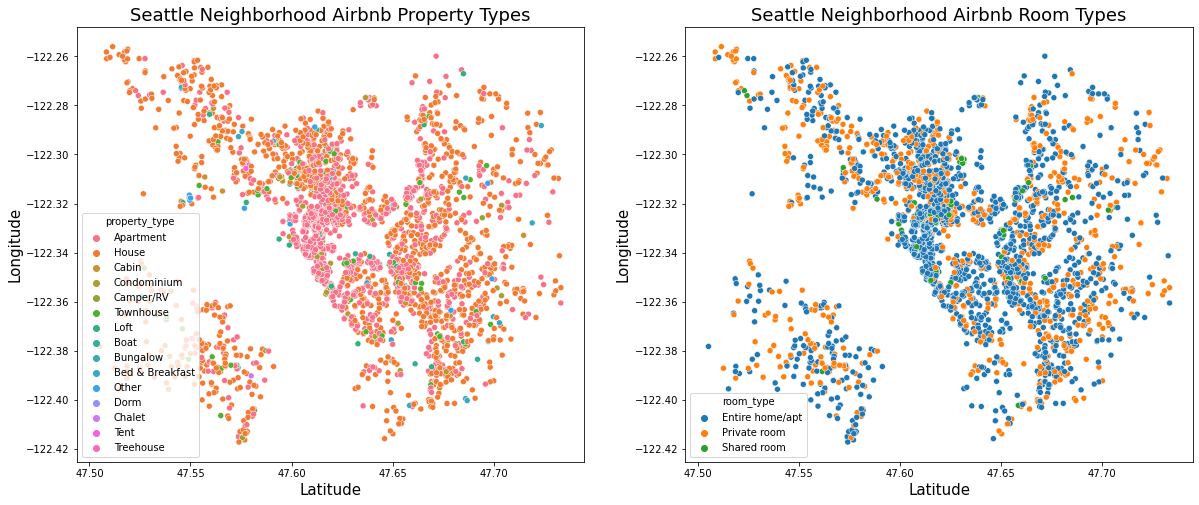

In [49]:
# plotting listings by property type and room type over location
fig = plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df1,x='latitude',y='longitude',hue='property_type')
plt.ylabel('Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.title('Seattle Neighborhood Airbnb Property Types', fontsize=18)

plt.subplot(1, 2, 2)
sns.scatterplot(data=df1,x='latitude',y='longitude',hue='room_type')
plt.ylabel('Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.title('Seattle Neighborhood Airbnb Room Types', fontsize=18);

#### 2. How is the price progress over the year?

In [50]:
#  calculating average price grouped by date
avg_price_date = df3.groupby('date')['price_2'].mean().reset_index()
avg_price_date['date'] = pd.to_datetime(avg_price_date['date'])

Text(0.5, 1.0, 'Seattle Airbnb price development in the year')

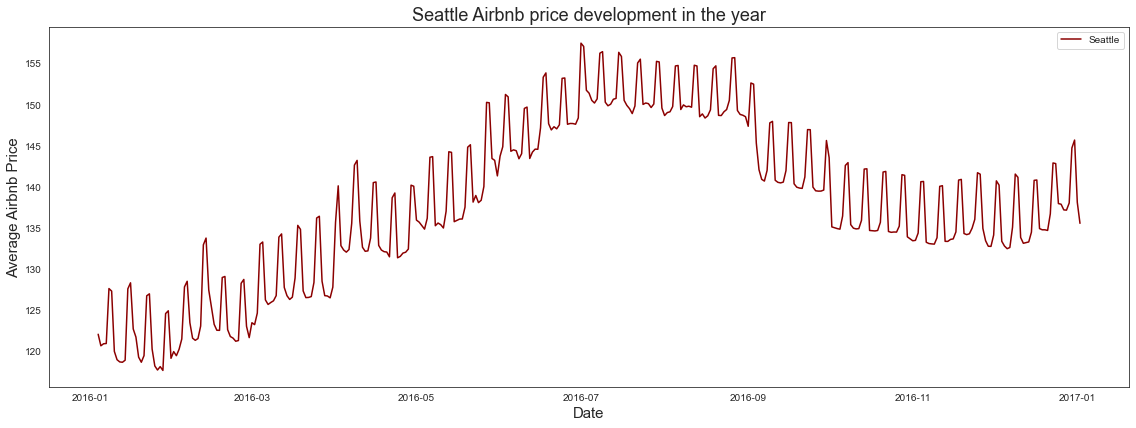

In [51]:
sns.set_style("white")
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(avg_price_date['date'], avg_price_date['price_2'], 'darkred', label='Seattle')
ax.legend(loc='best')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Average Airbnb Price', fontsize=15)
plt.title('Seattle Airbnb price development in the year',fontsize=18)

It's obvious at first glance, that the price is lowest at the beginning of year **from January to March**  between 117 and 134. Then it rises continiously until the price is highest in summer **from July to September** between 147 and 156. From September on the price falls but stays constantly to between 140 and 145.

#### 3. What time of year is the most popular for bookings?

In [52]:
df3.available.value_counts()

True     934542
False    459028
Name: available, dtype: int64

In [53]:
avail_day = df3.groupby('date').mean()['available'].reset_index()
avail_day['date'] = pd.to_datetime(avail_day['date'])
avail_day

,date,available
0,2016-01-04,0.454426
1,2016-01-05,0.488999
2,2016-01-06,0.478261
3,2016-01-07,0.465165
4,2016-01-08,0.466737
...,...,...
360,2016-12-29,0.742535
361,2016-12-30,0.743845
362,2016-12-31,0.748821
363,2017-01-01,0.765322


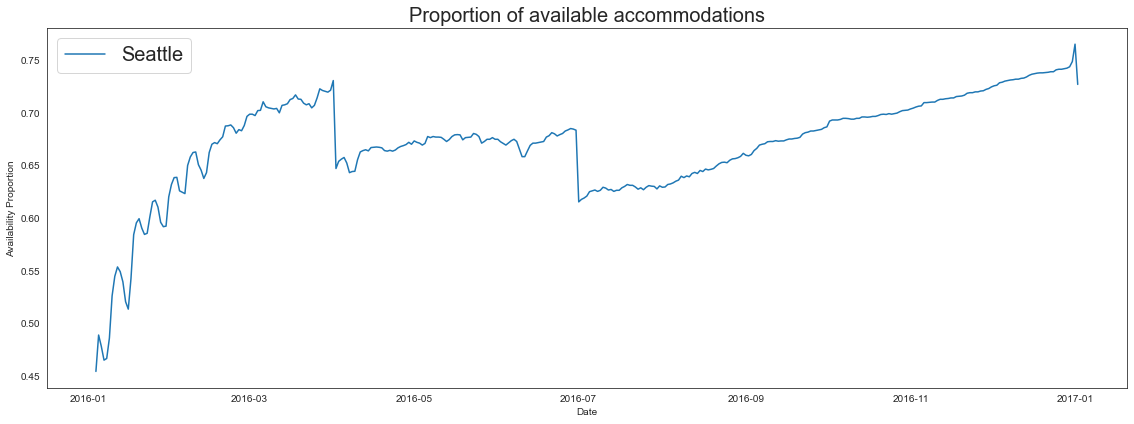

In [54]:
sns.set_style("white")
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(avail_day.date, avail_day.available, label='Seattle')
ax.legend(loc='best', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Availability Proportion')
plt.title('Proportion of available accommodations', fontsize=20);

It is recognizable, that the proportion of available listings in Seattle for the given period rises from January to April in a form of stairs rapidly - 45% to 73%. From April on the curve stays more or less continuos between 64% to 67%, which is still a good quote. In July there was a fall into 60%, from then on a quickly and slowly arise until January 2017, where the peak is 76%, which was the highest score in the year.

#### 4. Which Neighborhood is the most popular?

In [55]:
top_10_neighb = df1['neighbourhood_cleansed'].value_counts()[:10].sort_values(ascending=False)
top_10_neighb = pd.DataFrame({'neighbourhood_cleansed':top_10_neighb.index}).merge(df1, how='left')

Text(0.5, 1.0, 'Seattle Neighborhood Airbnb Room Types')

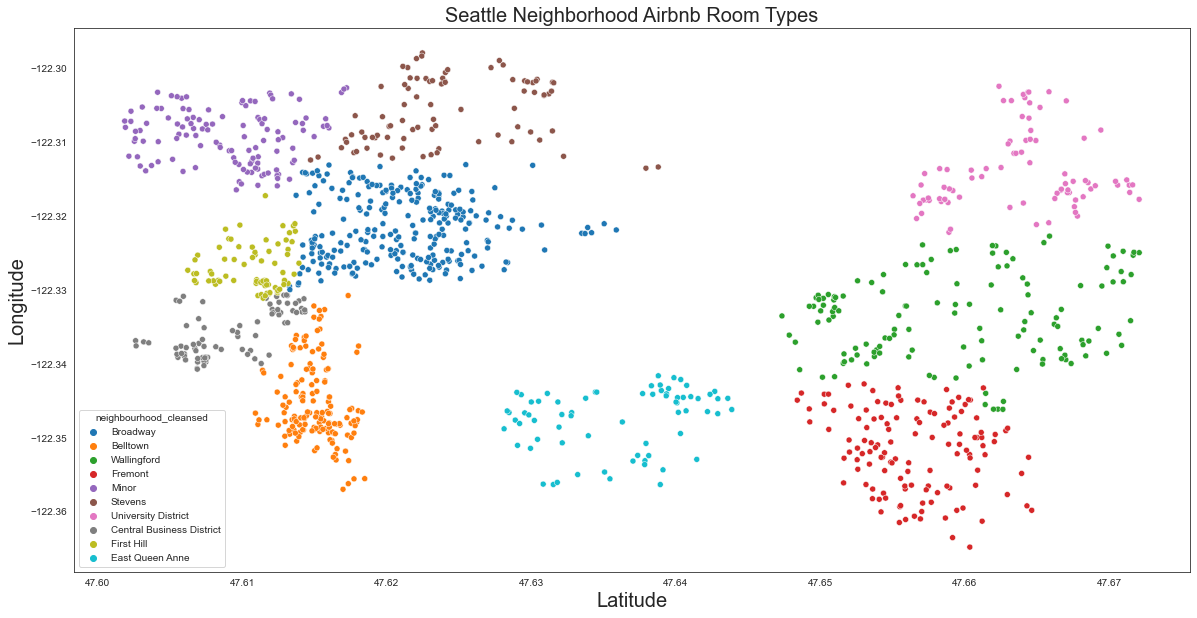

In [56]:
# Plotting top 10 most listed neighbourhoods by location
fig = plt.figure(figsize=(20,10))

# plt.subplot(1, 2, 1)
sns.scatterplot(data=top_10_neighb,x='latitude',y='longitude',hue='neighbourhood_cleansed')
plt.ylabel('Longitude',fontsize=20)
plt.xlabel('Latitude', fontsize=20)
ax.legend(loc='best', fontsize=50)
plt.title('Seattle Neighborhood Airbnb Room Types', fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Broadway'),
  Text(1, 0, 'Belltown'),
  Text(2, 0, 'Wallingford'),
  Text(3, 0, 'Fremont'),
  Text(4, 0, 'Minor'),
  Text(5, 0, 'Stevens'),
  Text(6, 0, 'University District'),
  Text(7, 0, 'Central Business District'),
  Text(8, 0, 'First Hill'),
  Text(9, 0, 'East Queen Anne')])

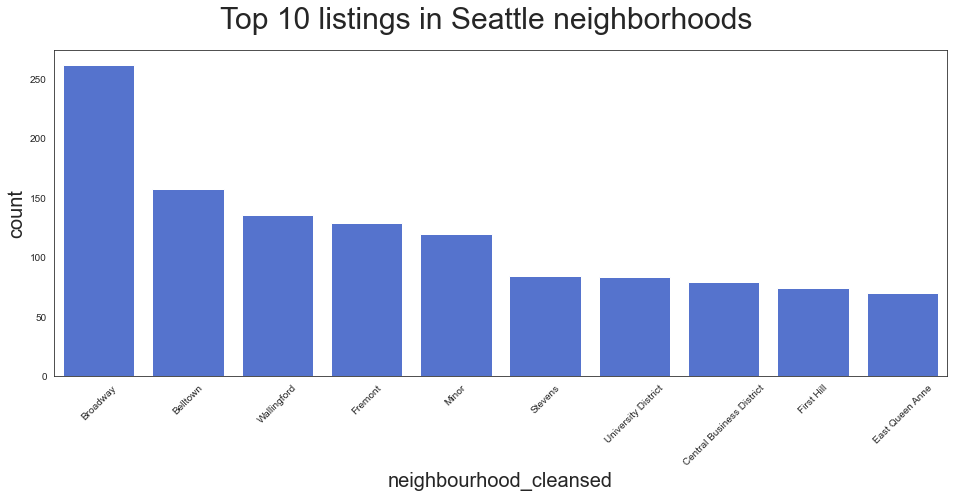

In [57]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Top 10 listings in Seattle neighborhoods', fontsize=30)
sns.countplot(data=top_10_neighb, x='neighbourhood_cleansed', color='royalblue')
plt.xlabel("neighbourhood_cleansed",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xticks(rotation=45)

The highest Airbnb density in Seattle is in Broadway with about 260 listings, followed by Belltown with 150. East Queen Anne has the least amount of Airbnbs with 75 listings.

Text(0.5, 1.0, 'Average review scores for Top 10 Seattle Neighborhoods')

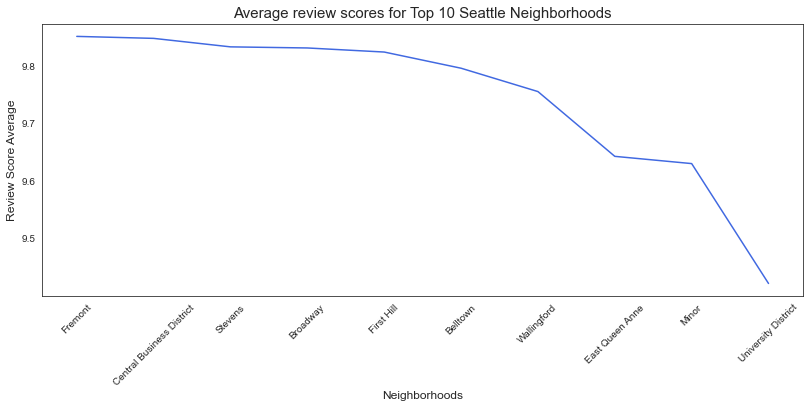

In [58]:
top_reviewed = top_10_neighb.groupby('neighbourhood_cleansed').review_scores_location.mean().sort_values(ascending=False)

# plotting the scores by neighborhood
fig = plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.plot(top_reviewed, label='Seattle', color='royalblue')
plt.ylabel('Review Score Average', fontsize=12)
plt.xlabel('Neighborhoods', fontsize=12)
plt.xticks(rotation=45)
plt.title('Average review scores for Top 10 Seattle Neighborhoods', fontsize=15)

The fourth highest listed neighbourhood Fremont has scored the best points, not Broadway. The lowest listed neighbourhoods like East Queen Anne and University district have scored the worst, which is not surprising, whereas the Minor has the second worst score, even it has listed much more than the worst scored one East Queen Anne.

#### 5. Which of the Seattle's Top 10 neighbourhoods are the most expensive?

In [59]:
top_prices = top_10_neighb.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False)
top_prices = top_10_neighb.query('price < 500')

Text(0.5, 1.0, 'Seattle Airbnb prices by neighbourhood ')

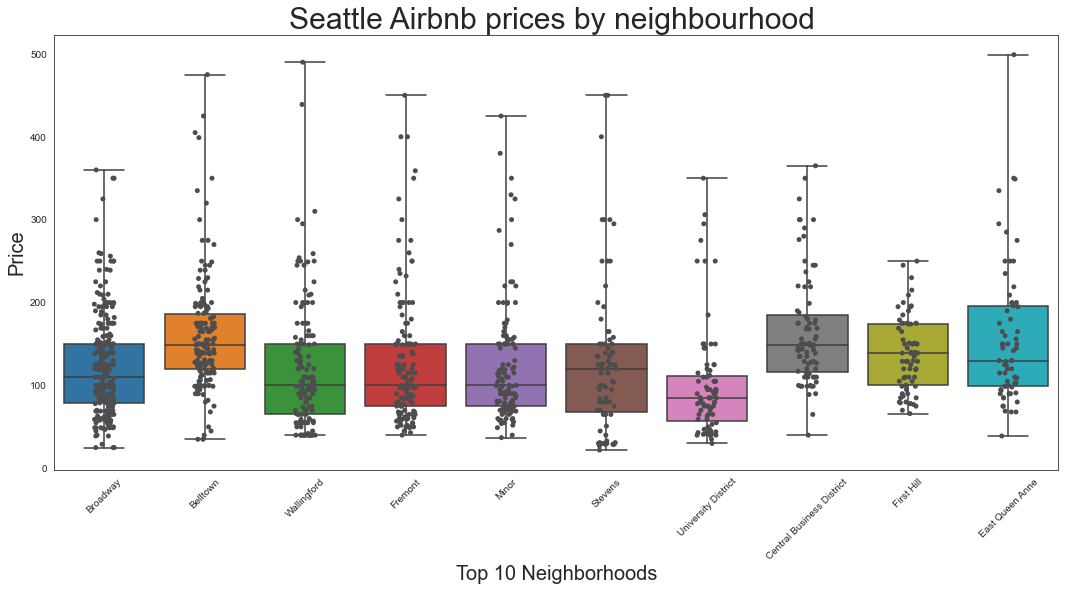

In [60]:
# plotting swarm plots for price by neighbourhood

plt.figure(figsize=(18,8))
#sns.swarmplot(data=top_prices, x='neighbourhood_cleansed', y='price', palette='Reds')
#sns.violinplot(x='neighbourhood_cleansed', y='price', data=top_prices, inner=None, color=".9")
sns.boxplot(x='neighbourhood_cleansed', y='price', data=top_prices, whis=np.inf)
sns.stripplot(data=top_prices, x='neighbourhood_cleansed', y='price', color=".3")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Top 10 Neighborhoods', fontsize=20)
plt.xticks(rotation=45)
plt.title('Seattle Airbnb prices by neighbourhood ', fontsize=30)

It seems like, that East Queen Anne, Belltown and Central Business District are up to 50 $ more expensive than the others.

#### 6. What are the most mentioned words in the comments?

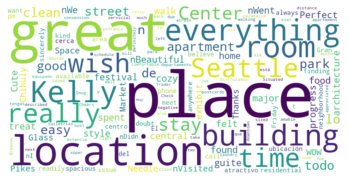

In [71]:
text = df2['comments'].values

wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=500,).generate(str(text))

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis("off")
plt.show()

The most mentioned words are: "great", "place", "location", "Seattle", "time", "room", "really", "room", "building", "everything" and "time".

#### 7. Which type of accommodation has the most reviews?

In [72]:
# Analyzing the listings regarding its number of comments
list_com_DF = df2.groupby('listing_id').comment_id.count()
list_com_DF = list_com_DF.reset_index()
list_com_DF = list_com_DF.rename(columns={'comment_id':'number_of_comments'})
list_com_DF.nlargest(10, 'number_of_comments')

,listing_id,number_of_comments
104,208356,474
162,365550,466
28,25002,404
35,47196,353
48,63308,320
59,92835,319
1,5682,297
137,279063,294
43,53867,287
318,841049,279


In [73]:
# merge the 2 dataframes df1 (listings.csv) and df2 (reviews.csv) with inner join based on the column 'listing_id'
joined_DF = pd.merge(df1, df2, on=['listing_id'], how='inner')
joined_DF.head(3)

,listing_id,name,summary,space,description,neighbourhood_cleansed,street,latitude,longitude,host_id,...,first_review,last_review,minimum_nights,maximum_nights,estimated_revenue,comment_id,date,reviewer_id,reviewer_name,comments
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,2011-11-01,2016-01-02,1,365,85.0,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,2011-11-01,2016-01-02,1,365,85.0,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,2011-11-01,2016-01-02,1,365,85.0,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...


Text(0.5, 25.0, 'room_type')

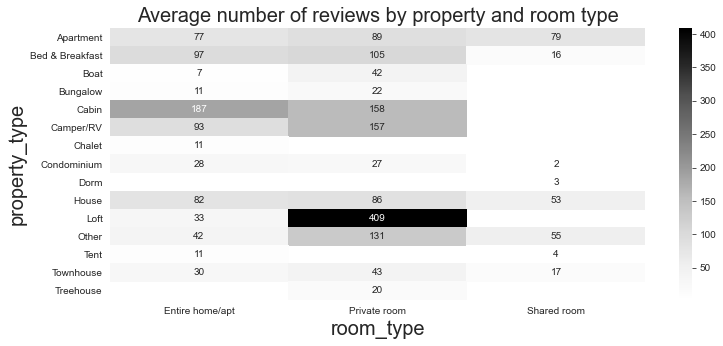

In [74]:
# plotting the average number_of_comments by property and room type
plt.figure(figsize=(12,5))
ax = sns.heatmap(joined_DF.groupby(['property_type','room_type']).
               number_of_reviews.mean().unstack(level=1),annot=True, fmt=".0f", cmap='Greys')
ax.set_title('Average number of reviews by property and room type', fontsize=20)
plt.ylabel('property_type', fontsize=20)
plt.xlabel('room_type', fontsize=20)

The above heatmap shows, that people give reviews the most for **Loft private rooms, Cabin in form of entire home or private room**. Private room in Camper/RV has also a big amount of reviews. People don't often leave reviews and comments for shared rooms.

#### 8. Which hosts have had the highest availability in the given period?

In [75]:
# merging the 2 dataframes df3 (calendar.csv) and the previous calculated table comm_DF for further analysis
avail_host = pd.merge(df1, df3, on=['listing_id'], how='inner')
avail_host['estimated_revenue'] = avail_host['price'] * avail_host['minimum_nights']
avail_host.head(3)

,listing_id,name,summary,space,description,neighbourhood_cleansed,street,latitude,longitude,host_id,...,reviews_per_month,number_of_reviews,first_review,last_review,minimum_nights,maximum_nights,estimated_revenue,date,available,price_2
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,4.07,207,2011-11-01,2016-01-02,1,365,85.0,2016-01-04,True,85.0
1,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,4.07,207,2011-11-01,2016-01-02,1,365,85.0,2016-01-05,True,85.0
2,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,West Queen Anne,"Gilman Dr W, Seattle, WA 98119, United States",47.636289,-122.371025,956883,...,4.07,207,2011-11-01,2016-01-02,1,365,85.0,2016-01-06,False,NaN


In [76]:
# Show the mostly available listings by host
avail_host = avail_host.groupby(['host_id','host_name','listing_id','property_type','room_type','neighbourhood_cleansed',
                                 'minimum_nights', 'price']).mean()['available'][:10].reset_index()
avail_host.sort_values('available', ascending=False)

,host_id,host_name,listing_id,property_type,room_type,neighbourhood_cleansed,minimum_nights,price,available
1,4193,Jessica,6117473,Treehouse,Private room,Dunlap,2,48.0,1.000000
6,11775,Andrew,4922836,House,Private room,Columbia City,2,70.0,1.000000
7,14942,Joyce,6606,Apartment,Entire home/apt,Wallingford,2,90.0,1.000000
9,14942,Joyce,11012,House,Entire home/apt,Wallingford,3,310.0,1.000000
8,14942,Joyce,9596,Apartment,Entire home/apt,Wallingford,3,120.0,0.994521
5,8993,Maddy,5682,Apartment,Entire home/apt,South Delridge,3,48.0,0.846575
4,8021,Becky,7038750,House,Private room,Loyal Heights,1,80.0,0.660274
0,4193,Jessica,1263470,House,Entire home/apt,Dunlap,2,100.0,0.512329
3,8021,Becky,6836330,House,Entire home/apt,Loyal Heights,1,90.0,0.498630
2,4193,Jessica,7745016,House,Private room,Dunlap,2,50.0,0.342466


#### 9. Which hosts have the highest estimated revenue, assuming that availability has been fully used?

In [77]:
# Revenue of the mostly available listings and show the top 10 
avail_host['revenue'] = avail_host.price * 365 * avail_host.available
avail_host.nlargest(10,'revenue') 

,host_id,host_name,listing_id,property_type,room_type,neighbourhood_cleansed,minimum_nights,price,available,revenue
9,14942,Joyce,11012,House,Entire home/apt,Wallingford,3,310.0,1.000000,113150.0
8,14942,Joyce,9596,Apartment,Entire home/apt,Wallingford,3,120.0,0.994521,43560.0
7,14942,Joyce,6606,Apartment,Entire home/apt,Wallingford,2,90.0,1.000000,32850.0
6,11775,Andrew,4922836,House,Private room,Columbia City,2,70.0,1.000000,25550.0
4,8021,Becky,7038750,House,Private room,Loyal Heights,1,80.0,0.660274,19280.0
0,4193,Jessica,1263470,House,Entire home/apt,Dunlap,2,100.0,0.512329,18700.0
1,4193,Jessica,6117473,Treehouse,Private room,Dunlap,2,48.0,1.000000,17520.0
3,8021,Becky,6836330,House,Entire home/apt,Loyal Heights,1,90.0,0.498630,16380.0
5,8993,Maddy,5682,Apartment,Entire home/apt,South Delridge,3,48.0,0.846575,14832.0
2,4193,Jessica,7745016,House,Private room,Dunlap,2,50.0,0.342466,6250.0


In [78]:
# showing revenue by host
host_rev = avail_host.groupby(['host_id','host_name']).agg({'revenue':'sum', 'property_type':'count'})
host_rev = host_rev.reset_index()
host_rev.nlargest(10, 'revenue')

,host_id,host_name,revenue,property_type
4,14942,Joyce,189560.0,3
0,4193,Jessica,42470.0,3
1,8021,Becky,35660.0,2
3,11775,Andrew,25550.0,1
2,8993,Maddy,14832.0,1


The host named **Joyce** with host id **14942** has potentially achieved the most amount of revenue of **189,560 $** in the given period of time by hosting 3 properties with high availability and short time bookings.